In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statistics
import math
sns.set_style('whitegrid')
import scipy
import sklearn
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import StandardScaler

# Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn import ensemble
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR

# Feature Selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [129]:
# Upload the data into Jupyter Notebook
df = pd.read_csv('/Users/cappsjr/Downloads/kc_house_data.csv')

# Take a quick peak at the data
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [130]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [131]:
# Rename the variables into something recognizable
df.columns = ['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'House_Size_Sqft', 'Lot_Size_Sqft', 
             'Number_of_Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'House_Size_Without_Basement_Sqft',
             'Basement_Size_Sqft', 'Year_Built', 'Year_Renovated', 'Zipcode', 'Latitude', 'Longitude',
             'sqft_living15', 'sqft_lot15']
df.head(2)

,ID,Date,Price,Bedrooms,Bathrooms,House_Size_Sqft,Lot_Size_Sqft,Number_of_Floors,Waterfront,View,...,Grade,House_Size_Without_Basement_Sqft,Basement_Size_Sqft,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


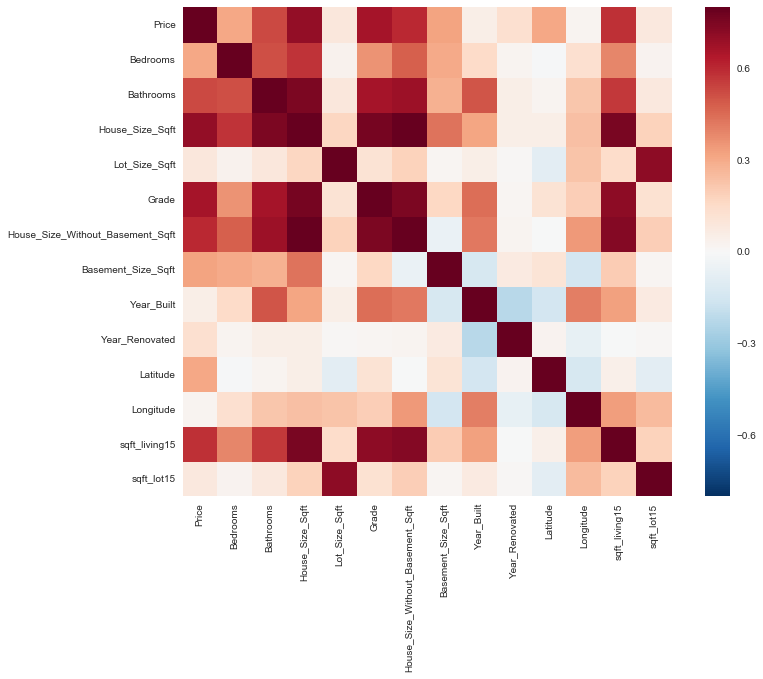

In [132]:
# Define continuous variables
cont_var = ['Price', 'Bedrooms', 'Bathrooms', 'House_Size_Sqft', 'Lot_Size_Sqft', 'Grade', 
            'House_Size_Without_Basement_Sqft', 'Basement_Size_Sqft', 'Year_Built', 'Year_Renovated', 
            'Latitude', 'Longitude', 'sqft_living15', 'sqft_lot15']

# Create a correlation matrix of continuous variables and a heatmap
corrmat = df[cont_var].corr()
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [133]:
# Print correlation matrix
print(corrmat)

                                     Price  Bedrooms  Bathrooms  \
Price                             1.000000  0.308350   0.525138   
Bedrooms                          0.308350  1.000000   0.515884   
Bathrooms                         0.525138  0.515884   1.000000   
House_Size_Sqft                   0.702035  0.576671   0.754665   
Lot_Size_Sqft                     0.089661  0.031703   0.087740   
Grade                             0.667434  0.356967   0.664983   
House_Size_Without_Basement_Sqft  0.605567  0.477600   0.685342   
Basement_Size_Sqft                0.323816  0.303093   0.283770   
Year_Built                        0.054012  0.154178   0.506019   
Year_Renovated                    0.126434  0.018841   0.050739   
Latitude                          0.307003 -0.008931   0.024573   
Longitude                         0.021626  0.129473   0.223042   
sqft_living15                     0.585379  0.391638   0.568634   
sqft_lot15                        0.082447  0.029244   0.08717

In [135]:
# Drop sqft_living15 and sqft_lot15 because I don't know what they are, and they are highly correlated with
# sqft_living and sqft_lot

df = df.drop(['sqft_living15', 'sqft_lot15', 'House_Size_Without_Basement_Sqft'], axis=1)

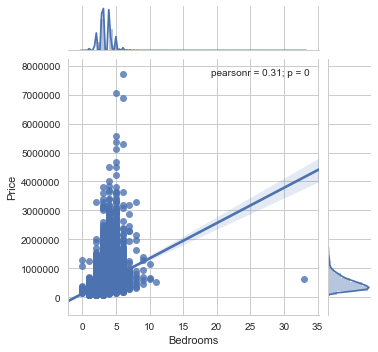

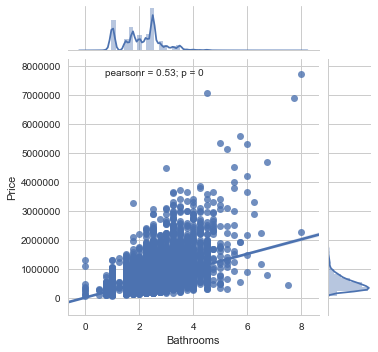

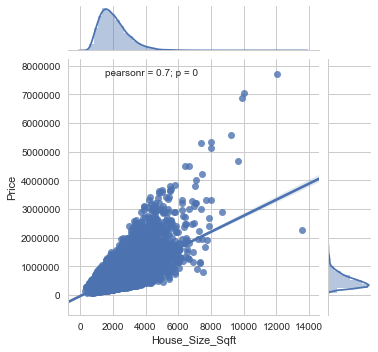

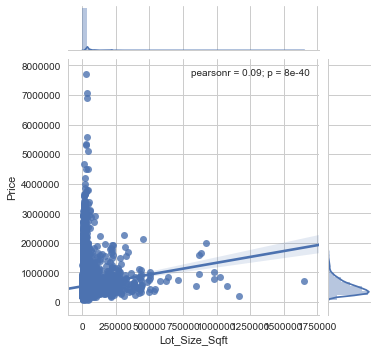

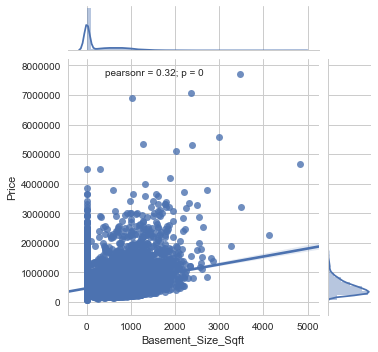

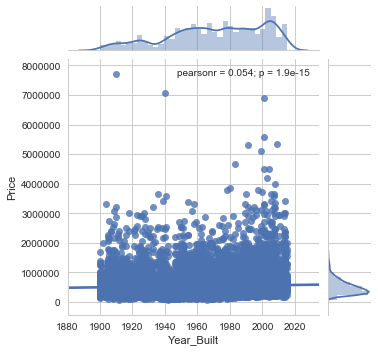

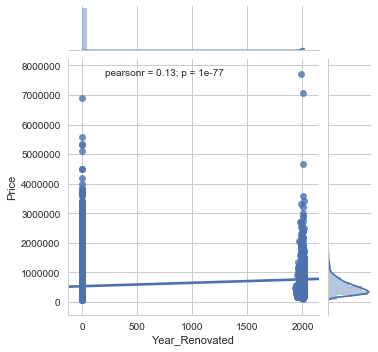

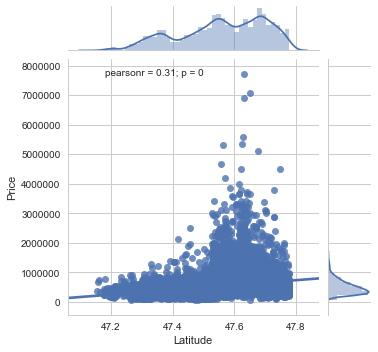

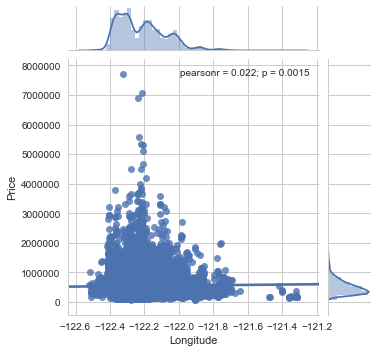

In [136]:
# Lets take a look at the relationship between some of the continuous variables and my target variable (price)

# Define variable containing list of the continuous predictor variables
cont_pred_var = ['Bedrooms', 'Bathrooms', 'House_Size_Sqft', 'Lot_Size_Sqft', 'Basement_Size_Sqft', 
                 'Year_Built', 'Year_Renovated', 'Latitude', 'Longitude']

for items in cont_pred_var:
    sns.jointplot(x=items, y='Price', data=df, kind='reg', size=5)

In [137]:
# Lets make new categorical variables showing whether each house 1) has a basement; 2) was renovated.
df['Has_Basement'] = np.where(df['Basement_Size_Sqft'] > 0, 1, 0)
df['Was_Renovated'] = np.where(df['Year_Renovated'] > 0, 1, 0)

df.head(2)

,ID,Date,Price,Bedrooms,Bathrooms,House_Size_Sqft,Lot_Size_Sqft,Number_of_Floors,Waterfront,View,Condition,Grade,Basement_Size_Sqft,Year_Built,Year_Renovated,Zipcode,Latitude,Longitude,Has_Basement,Was_Renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1,1


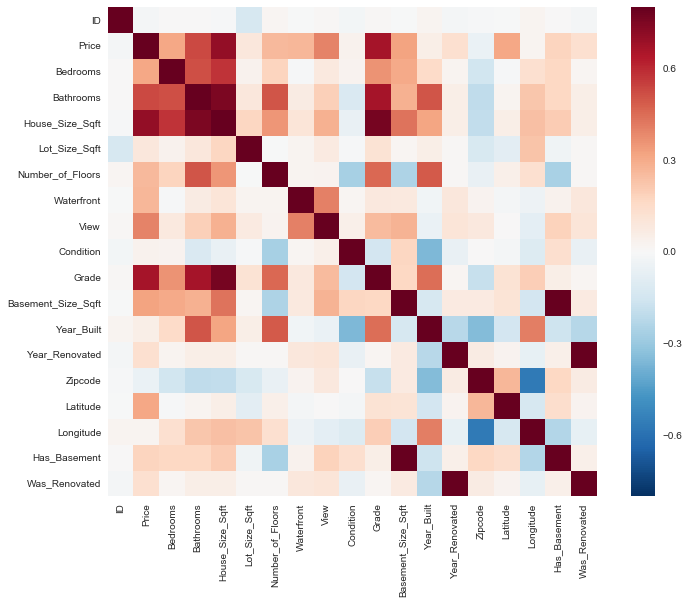

In [138]:
# Create a correlation matrix of continuous variables and a heatmap
corrmat1 = df.corr()
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn.
sns.heatmap(corrmat1, vmax=.8, square=True)
plt.show()

In [149]:
# Lets define a function that will select the best features for our random forest classifier

def ranfor_fselector(X, y, n_est, max_dep):
    params = {'n_estimators': n_est, 'max_depth': max_dep}
    rfr = ensemble.RandomForestRegressor(**params)
    rfecv = RFECV(estimator=rfr, step=1, cv=StratifiedKFold(3),
              scoring='r2')
    fit = rfecv.fit(X, y)
    pred = rfecv.predict(X)
    score = rfecv.score(X, y)
    print('Number of Features Used: ', rfecv.n_features_)
    print('\nFeature Ranking: ', rfecv.ranking_)

In [150]:
# Define your predictor variable
rfr_var = df.drop(['Price', 'ID', 'Date'], axis=1)

# Run the feature selection funtion
ranfor_fselector(rfr_var, df['Price'], 500, 5)

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Number of Features Used:  7

Feature Ranking:  [ 6  3  1  2  8  1  1  9  1  5  1  7  4  1  1 11 10]


In [151]:
# Get a list of the features to determine which features were selected by the feature selection function
rfr_var.columns

Index(['Bedrooms', 'Bathrooms', 'House_Size_Sqft', 'Lot_Size_Sqft',
       'Number_of_Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Basement_Size_Sqft', 'Year_Built', 'Year_Renovated', 'Zipcode',
       'Latitude', 'Longitude', 'Has_Basement', 'Was_Renovated'],
      dtype='object')

In [152]:
# Create a variable that includes only those features chosen by the feature selection function
rf_feat = df[['House_Size_Sqft', 'Waterfront', 'View', 'Grade', 'Year_Built', 'Latitude', 'Longitude']]

In [123]:
# Lets create another function for a weighted K Nearest Neighbors model

# Create an empty DataFrame for comparing actual v. predicted results
knn_w_df = pd.DataFrame()
    
def knn_reg_weighted(X, y, k, cvk):
    X = StandardScaler().fit_transform(X)
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='distance') # Instantiate the model
    fit = knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    knn_w_df['Actual'] = y_test
    knn_w_df['Predicted'] = pred
    print('\nR-squared Weighted KNN: \n', score)
    knn_crossval = cross_val_score(knn, X, y, cv=cvk)
    print('\nMean Weighted R-squared: %0.2f (+/- %0.2f)' % (knn_crossval.mean(), knn_crossval.std() * 2))
    mse = mean_squared_error(y_test, pred)
    print('\nMean Squared Error: \n', mse)
    mae = mean_absolute_error(y_test, pred)
    print('\nMean Absolute Error: \n', mae)
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, pred)
    plt.show()
    plt.figure(figsize=(12, 6))
    sns.jointplot(x='Actual', y='Predicted', data=knn_w_df, kind='reg', size=5)
    plt.show()


R-squared Weighted KNN: 
 0.855085938305

Mean Weighted R-squared: 0.83 (+/- 0.02)

Mean Squared Error: 
 20097617957.5

Mean Absolute Error: 
 77822.4872376


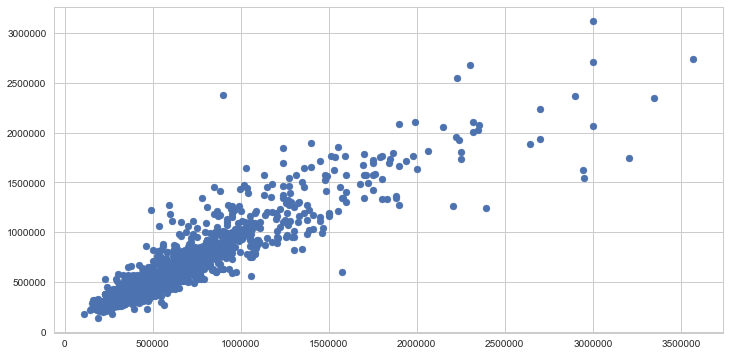

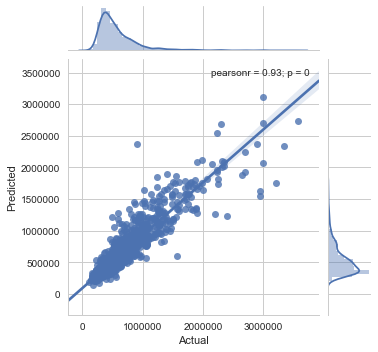

In [157]:
# Run the KNN regression with the selected features

knn_reg_weighted(rf_feat, df['Price'], 15, 5)

In [111]:
# Create an empty DataFrame to compare actual and prediction values
rf_df = pd.DataFrame()

# Now lets write a function for a random forest regression

def ranfor_reg(X, y, n_est, max_dep, cvk):
    params = {'n_estimators': n_est, 'max_depth': max_dep}
    rfr = ensemble.RandomForestRegressor(**params)
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    fit = rfr.fit(X_train, y_train)
    pred = rfr.predict(X_test)
    score = rfr.score(X_test, y_test)
    rf_df['Actual'] = y_test
    rf_df['Predicted'] = pred
    print('\nR-squared Random Forest: \n', score)
    rfr_crossval = cross_val_score(rfr, X, y, cv=cvk)
    print('\nCross Validated Accuracy: \n', rfr_crossval)
    print('\n Mean R-squared: %0.2f (+/- %0.2f)' % (rfr_crossval.mean(), rfr_crossval.std() * 2))
    mse = mean_squared_error(y_test, pred)
    print('\nMean Squared Error: \n', mse)
    mae = mean_absolute_error(y_test, pred)
    print('\nMean Absolute Error: \n', mae)
    # Make importances relative to max importance
    feature_importance = rfr.feature_importances_
    feature_importance = 100 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) +  0.5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative importance')
    plt.ylabel('Variable importance')
    plt.show()
    # Jointplt and scatterplot showing actual v prediction values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, pred)
    plt.show()
    plt.figure(figsize=(12, 6))
    sns.jointplot(x='Actual', y='Predicted', data=rf_df, kind='reg', size=5)
    plt.show()


R-squared Random Forest: 
 0.88129681359

Cross Validated Accuracy: 
 [ 0.87302441  0.8842065   0.87533242  0.86535421  0.8782263 ]

 Mean R-squared: 0.88 (+/- 0.01)

Mean Squared Error: 
 16462524498.4

Mean Absolute Error: 
 70882.6211508


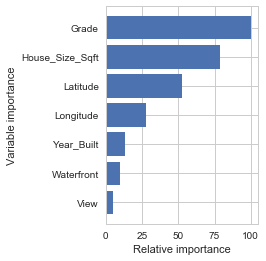

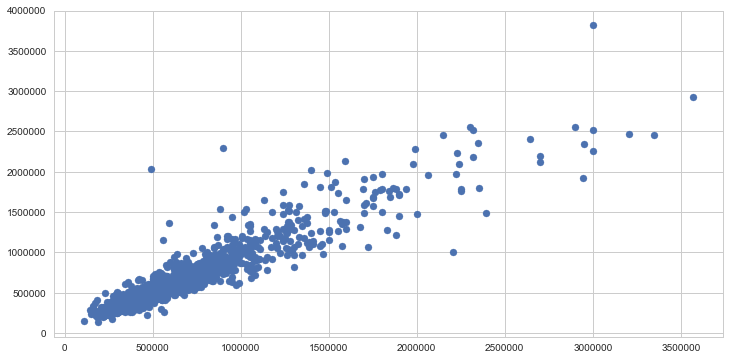

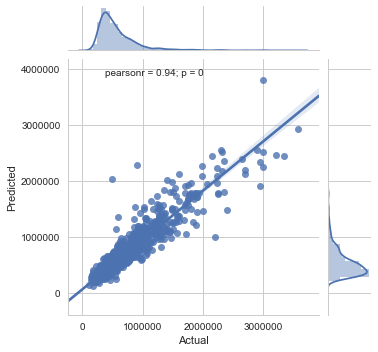

In [154]:
# Define you arguments and run the model with the selected features
ranfor_reg(rf_feat, df['Price'], 500, None, 5)

In [155]:
# Create an empty DataFrame to compare actual v prediction values
gb_df = pd.DataFrame()

# Lets make a function for our gradient boosting regressor

def gbr_reg(X, y, los, n_est, max_dep, cvk):
    params = {'loss': los, 'n_estimators': n_est, 'max_depth':  max_dep}
    gbr = ensemble.GradientBoostingRegressor(**params)
    offset = int(X.shape[0] * 0.9)
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    fit = gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    score = gbr.score(X_test, y_test)
    gb_df['Actual'] = y_test
    gb_df['Predicted'] = pred
    print('\nR-squared Gradient Boosting Reg: \n', score)
    gbr_crossval = cross_val_score(gbr, X, y, cv=cvk)
    print('\nCross-validated R-squares: \n', gbr_crossval)
    print('\nMean Accuracy: %0.2f (+/- %0.2f)' % (gbr_crossval.mean(), gbr_crossval.std() * 2))
    mse = mean_squared_error(y_test, pred)
    print('\nMean Squared Error: \n', mse)
    mae = mean_absolute_error(y_test, pred)
    print('\nMean Absolute Error: \n', mae)
    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(gbr.staged_predict(X_test)):
        test_score[i] = gbr.loss_(y_test, y_pred)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Loss')
    plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Loss')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Loss')
    plt.show()
    # Make importances relative to max importance
    feature_importance = gbr.feature_importances_
    feature_importance = 100 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) +  0.5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative importance')
    plt.ylabel('Variable importance')
    plt.show()
    # Jointplt and scatterplot showing actual v prediction values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, pred)
    plt.show()
    plt.figure(figsize=(12, 6))
    sns.jointplot(x='Actual', y='Predicted', data=gb_df, kind='reg', size=5)
    plt.show()


R-squared Gradient Boosting Reg: 
 0.787174228125

Cross-validated R-squares: 
 [ 0.76615499  0.79269954  0.76575416  0.76434333  0.76627619]

Mean Accuracy: 0.77 (+/- 0.02)

Mean Squared Error: 
 29516052511.6

Mean Absolute Error: 
 93190.0851622


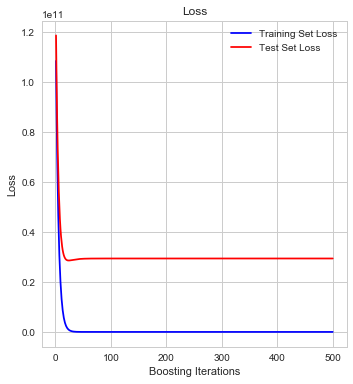

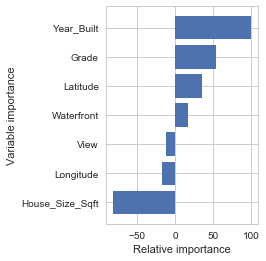

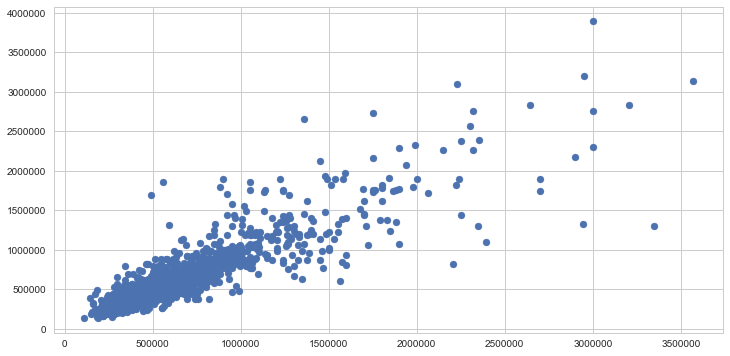

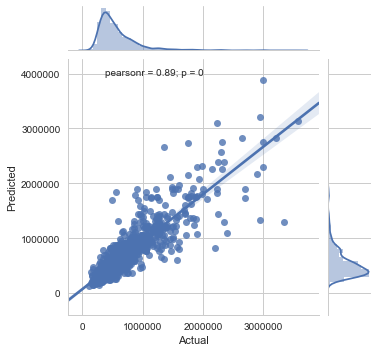

In [156]:
# Lets run the model with the selected features

gbr_reg(rf_feat, df['Price'], 'ls', 500, None, 5)